In [1]:
from allensdk.core.mouse_connectivity_cache import MouseConnectivityCache
mcc = MouseConnectivityCache(manifest_file='connectivity/mouse_connectivity_manifest.json')
import pandas as pd

# grab the StructureTree instance
structure_tree = mcc.get_structure_tree()

### Generate list of edges in entire brain

In [2]:
# Get all experiments
experiments = mcc.get_experiments()

print("%d experiments total" % len(experiments))

# Organize our columns all nice like for retrieval from structure_unionizes
cols = ['experiment_id', 'id','origin_abbrev', 'origin_id', 'target_abbrev', 'target_id', 'is_injection',
       'max_voxel_density', 'max_voxel_x', 'max_voxel_y', 'max_voxel_z',
       'normalized_projection_volume', 'projection_density',
       'projection_energy', 'projection_intensity', 'projection_volume',
       'sum_pixel_intensity', 'sum_pixels',
       'sum_projection_pixel_intensity', 'sum_projection_pixels', 'volume'
       ]
unionizes = pd.DataFrame(columns=cols)
# Grab unionizes for all hypothalmus experiments (all origin nodes will be in the hypothalmus, target nodes will be anywhere)
for exp in experiments:
    # Go one experiment at a time, getting info on what happened after an injection to the "experiment['structure_id']" site
    # ASSUMING that the "structure_id" listed for an experiment is the STARTING NODE of an edge
    structure_unionizes = mcc.get_structure_unionizes([exp['id']],  # Experiment ID
                                                      is_injection=True,  # only return unionize records that include injection pixels
                                                      include_descendants=True,
                                                      hemisphere_ids=[3])  # Get data from both left and right hemispheres
    structure_unionizes['origin_abbrev'] = exp['structure_abbrev']  # acronym for primary injection site
    structure_unionizes['origin_id'] = exp['structure_id']  # ID for primary injection site
    structure_unionizes['target_id'] = structure_unionizes['structure_id']  # Resultant target of injection (n2)
    structure_unionizes['target_abbrev'] = ""  # Save for later
    # Put columns in right order
    structure_unionizes = structure_unionizes[cols]
    # Add this unionize to overall dataframe
    unionizes = unionizes.append(structure_unionizes)

print("%d total injection unionizes" % unionizes.shape[0])
# Reorganize experiment list into dataframe
experiments = mcc.get_experiments(dataframe=True)

2997 experiments total
82882 total injection unionizes


In [3]:
unionizes.to_csv('unionizes.csv', index=False)  # Holy moly we never want to do this again

In [2]:
unionizes = pd.read_csv('unionizes.csv')
unionizes.head()

,experiment_id,id,origin_abbrev,origin_id,target_abbrev,target_id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,...,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
0,527712447,634906034,SUB,502,NaN,727,True,0.754546,9640,4100,...,0.035609,0.171435,248.960744,1452.213231,0.000237,5.544512e+08,1.128387e+06,2.809242e+08,1.934455e+05,1.382275e-03
1,527712447,634905976,SUB,502,NaN,695,True,0.888539,9240,3070,...,0.995127,0.168564,282.444833,1675.593664,0.006622,1.901853e+10,3.207073e+07,9.058211e+09,5.405971e+06,3.928664e-02
2,527712447,634907689,SUB,502,NaN,10703,True,0.000000,0,0,...,0.000000,0.000000,0.000000,0.000000,0.000000,3.655566e+00,1.253169e-02,0.000000e+00,0.000000e+00,1.535131e-11
3,527712447,634905326,SUB,502,NaN,502,True,0.888539,9240,3070,...,0.602572,0.158053,240.456773,1521.365606,0.004010,1.140852e+10,2.071098e+07,4.980094e+09,3.273437e+06,2.537095e-02
4,527712447,634904334,SUB,502,NaN,8,True,0.888539,9240,3070,...,0.995127,0.168564,282.444833,1675.593664,0.006622,1.901853e+10,3.207073e+07,9.058211e+09,5.405971e+06,3.928664e-02


### Get edges going to/from hypothalamus

In [3]:
# Add acronyms for target IDs
unionizes['target_abbrev'] = unionizes.apply(lambda x: structure_tree.get_structures_by_id([x['target_id']])[0]['acronym'], axis=1)
unionizes.sort_values(by=['projection_intensity'], ascending=False).head()

,experiment_id,id,origin_abbrev,origin_id,target_abbrev,target_id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,...,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
5697,142656218,633715196,ENTl,918,scwm,484682512,True,0.134885,9170,3340,...,0.000004,1.000000,21101.511889,21101.511889,5.167425e-07,8.901264e+06,4.218306e+02,8.901264e+06,4.218306e+02,5.167425e-07
38095,146077302,633885043,VISpm,533,RSPagl2/3,965,True,1.000000,8310,580,...,0.011075,1.000000,20036.776493,20036.776493,6.762533e-04,1.106117e+10,5.520435e+05,1.106117e+10,5.520435e+05,6.762533e-04
38107,146077302,633884710,VISpm,533,VISpm4,501,True,1.000000,8190,580,...,0.091208,1.000000,18918.695338,18918.695338,5.569105e-03,8.600832e+10,4.546208e+06,8.600832e+10,4.546208e+06,5.569105e-03
20438,176886238,630101077,BST,351,PT,15,True,1.000000,5740,4620,...,0.117493,0.999045,18104.446380,18121.748533,6.508481e-02,9.631659e+11,5.318124e+07,9.628168e+11,5.313046e+07,6.514701e-02
5699,142656218,633714132,ENTl,918,TEa5,289,True,0.401919,9250,3310,...,0.000093,1.000000,17835.816290,17835.816290,1.257386e-05,1.830735e+08,1.026437e+04,1.830735e+08,1.026437e+04,1.257386e-05


### Make the table pretty
Sort table -> Drop duplicates -> Remove self-loops

In [4]:
all_edges = unionizes.sort_values(by=['projection_intensity'], ascending=False)
# If there's a duplicate, drop all but the most intense one
all_edges = all_edges.drop_duplicates(subset=['origin_id', 'target_id'], keep='first')
# Remove self-loops
all_edges = all_edges.loc[all_edges['origin_id'] != all_edges['target_id']]
# Make a more readable table with top 50% intensities
#all_edges = all_edges.iloc[:round(all_edges.shape[0] / 2)][['origin_abbrev', 'origin_id', 'target_abbrev', 'target_id', 'projection_intensity']]
all_edges[['origin_abbrev', 'origin_id', 'target_abbrev', 'target_id', 'projection_intensity']]
print('%d total edges after removing duplicates and self-loops' % all_edges.shape[0])
all_edges.head()

13582 total edges after removing duplicates and self-loops


,experiment_id,id,origin_abbrev,origin_id,target_abbrev,target_id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,...,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
5697,142656218,633715196,ENTl,918,scwm,484682512,True,0.134885,9170,3340,...,0.000004,1.000000,21101.511889,21101.511889,5.167425e-07,8.901264e+06,4.218306e+02,8.901264e+06,4.218306e+02,5.167425e-07
38095,146077302,633885043,VISpm,533,RSPagl2/3,965,True,1.000000,8310,580,...,0.011075,1.000000,20036.776493,20036.776493,6.762533e-04,1.106117e+10,5.520435e+05,1.106117e+10,5.520435e+05,6.762533e-04
38107,146077302,633884710,VISpm,533,VISpm4,501,True,1.000000,8190,580,...,0.091208,1.000000,18918.695338,18918.695338,5.569105e-03,8.600832e+10,4.546208e+06,8.600832e+10,4.546208e+06,5.569105e-03
20438,176886238,630101077,BST,351,PT,15,True,1.000000,5740,4620,...,0.117493,0.999045,18104.446380,18121.748533,6.508481e-02,9.631659e+11,5.318124e+07,9.628168e+11,5.313046e+07,6.514701e-02
5699,142656218,633714132,ENTl,918,TEa5,289,True,0.401919,9250,3310,...,0.000093,1.000000,17835.816290,17835.816290,1.257386e-05,1.830735e+08,1.026437e+04,1.830735e+08,1.026437e+04,1.257386e-05


In [5]:
all_edges.to_csv('./whole brain/edge list.csv', index=False)

In [6]:
# Get list of hypothalamus nodes from separate edge list
el = pd.read_csv('./escape edges graphs/hy edge list.csv')
hy_nodes = list(el['origin_id'].unique())

### Create list of all edges going to/from hypothalamus

In [7]:
# Create new dataframe with only edges going to/from hypothalamus
hy_edges = all_edges.loc[(all_edges['origin_id'].isin(hy_nodes)) | (all_edges['target_id'].isin(hy_nodes))]
print('There are %d edges going to/from the hypothalamus.' % hy_edges.shape[0])
hy_edges.head()

There are 1832 edges going to/from the hypothalamus.


,experiment_id,id,origin_abbrev,origin_id,target_abbrev,target_id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,...,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
74946,313325371,634205213,VMH,693,PMv,1004,True,1.000000,7530,6680,...,0.106217,0.999797,15681.265950,15684.446912,0.104063,1.332621e+12,8.496624e+07,1.332378e+12,8.494901e+07,0.104084
57969,180674463,630259390,AHN,88,ASO,332,True,1.000000,6120,6240,...,0.002448,1.000000,15607.258483,15607.258483,0.003425,4.364258e+10,2.796300e+06,4.364258e+10,2.796300e+06,0.003425
18906,264320076,630880636,TU,614,PMv,1004,True,1.000000,7460,6580,...,0.109980,0.999935,14983.580888,14984.558083,0.084149,1.029361e+12,6.869749e+07,1.029334e+12,6.869301e+07,0.084154
81345,158258062,628586309,VMH,693,sup,349,True,0.818368,6610,6800,...,0.000104,0.999930,14964.597403,14965.643477,0.000153,1.863393e+09,1.245111e+05,1.863259e+09,1.245024e+05,0.000153
81347,158258062,628587889,VMH,693,mfsbshy,824,True,1.000000,7140,6400,...,0.000116,0.999937,14409.750982,14410.654546,0.000170,2.000256e+09,1.388033e+05,2.000121e+09,1.387946e+05,0.000170


# Top 50% intensity analysis

### Select top 50% of edges

In [25]:
# Get top 50% of HY edges
hy_edges = hy_edges.iloc[:round(hy_edges.shape[0] / 2)]
print('There are %d edges in the top 50%% intensities going to/from the HY' % hy_edges.shape[0])
hy_edges.head()

There are 916 edges in the top 50% intensities going to/from the HY


,experiment_id,id,origin_abbrev,origin_id,target_abbrev,target_id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,...,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
74946,313325371,634205213,VMH,693,PMv,1004,True,1.000000,7530,6680,...,0.106217,0.999797,15681.265950,15684.446912,0.104063,1.332621e+12,8.496624e+07,1.332378e+12,8.494901e+07,0.104084
57969,180674463,630259390,AHN,88,ASO,332,True,1.000000,6120,6240,...,0.002448,1.000000,15607.258483,15607.258483,0.003425,4.364258e+10,2.796300e+06,4.364258e+10,2.796300e+06,0.003425
18906,264320076,630880636,TU,614,PMv,1004,True,1.000000,7460,6580,...,0.109980,0.999935,14983.580888,14984.558083,0.084149,1.029361e+12,6.869749e+07,1.029334e+12,6.869301e+07,0.084154
81345,158258062,628586309,VMH,693,sup,349,True,0.818368,6610,6800,...,0.000104,0.999930,14964.597403,14965.643477,0.000153,1.863393e+09,1.245111e+05,1.863259e+09,1.245024e+05,0.000153
81347,158258062,628587889,VMH,693,mfsbshy,824,True,1.000000,7140,6400,...,0.000116,0.999937,14409.750982,14410.654546,0.000170,2.000256e+09,1.388033e+05,2.000121e+09,1.387946e+05,0.000170


#### Create 3 groups of hypothalamic edges
Outgoing edges : Edges which start *in* the hypothalamus and *leave*

Incoming edges : Edges which start *outside* the hypothalamus and *enter*

Internal edges : Edges that start *in* the hypothalamus and *end there*

In [26]:
# Find list of outgoing/incoming/internal edges
outgoing_edges = hy_edges.loc[~hy_edges['target_id'].isin(hy_nodes)]  # The target is not in the hypothalamus
incoming_edges = hy_edges.loc[(~hy_edges['origin_id'].isin(hy_nodes)) & (hy_edges['target_id'].isin(hy_nodes))]  # The origin isn't in the HY and the target is
internal_edges = hy_edges.loc[(hy_edges['origin_id'].isin(hy_nodes)) & (hy_edges['target_id'].isin(hy_nodes))]  # Both the origin and target are in the HY

In [27]:
# Read problem node list from CSV
problem_nodes = pd.read_csv('../../spreadsheets/Hypothalamic Optimization counts.csv')
problem_nodes = problem_nodes.loc[problem_nodes['structure-id'].isin(hy_nodes)]

# For each node, count up # of escape edges it participates in
problem_nodes['outgoing edges'] = problem_nodes.apply(lambda row: outgoing_edges.loc[outgoing_edges['origin_id'] == row['structure-id']].shape[0], axis=1)
# For each node, count up # of nonescape edges it participates in
problem_nodes['incoming edges'] = problem_nodes.apply(lambda row: incoming_edges.loc[incoming_edges['target_id'] == row['structure-id']].shape[0], axis=1)
# For each node, count up # of internal edges it participates in
problem_nodes['internal edges'] = problem_nodes.apply(lambda row: internal_edges.loc[(internal_edges['origin_id'] == row['structure-id']) | (internal_edges['target_id'] == row['structure-id'])].shape[0], axis=1)

# Add up edges that communicate w/ outside HY
problem_nodes['outgoing+incoming'] = problem_nodes['outgoing edges'] + problem_nodes['incoming edges']
# Idk if this is useful, but calculate ratio of escape edges : nonescape edges
problem_nodes['outgoing+incoming / internal'] = problem_nodes['outgoing+incoming'] / problem_nodes['internal edges']
problem_nodes.head()

,structure-id,structure-abbrev,structure-name,Counts in distance>5,outgoing edges,incoming edges,internal edges,outgoing+incoming,outgoing+incoming / internal
0,194,LHA,Lateral hypothalamic area,7,37,3,21,40,1.904762
1,491,MM,Medial mammillary nucleus,6,62,0,16,62,3.875000
2,88,AHN,Anterior hypothalamic nucleus,6,59,0,20,59,2.950000
3,830,DMH,Dorsomedial nucleus of the hypothalamus,6,39,0,16,39,2.437500
4,210,LM,Lateral mammillary nucleus,5,14,0,11,14,1.272727


#### Plot showing problem nodes with the # of edges they participate in with a poorly optimized solution, compared to # of escape edges that node has

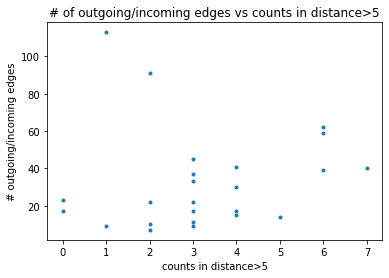

In [28]:
import matplotlib.pyplot as plt
plt.scatter(problem_nodes['Counts in distance>5'],problem_nodes['outgoing+incoming'], marker='.')
plt.ylabel('# outgoing/incoming edges')
plt.xlabel('counts in distance>5')
plt.title('# of outgoing/incoming edges vs counts in distance>5')
plt.savefig('./whole brain/50 percent outgoing+incoming edges vs counts in distance.png')
plt.show()

In [29]:
# Get edge list with optimization distances
edges_df = pd.read_csv('../../spreadsheets/Hypothalamic Optimization Distances.csv')
edges_df['distance from true'] = abs(edges_df['distance from true'])
edges_df.head(5)

,n1,n2,intensity,distance,R1+R2,opt. distance,distance from true,structure-name,structure-name.1
0,390,347,0.000000,5.952730,0.520410,3.415775,2.536956,Supraoptic nucleus,Subparaventricular zone
1,347,390,187.580505,5.952730,0.520410,3.416737,2.535993,Subparaventricular zone,Supraoptic nucleus
2,523,525,2858.119629,2.788942,0.903663,0.408480,2.380462,Medial preoptic area,Supramammillary nucleus
3,525,523,1468.252319,2.788942,0.903663,0.408575,2.380367,Supramammillary nucleus,Medial preoptic area
4,210,515,1130.482910,2.621622,0.723160,0.414124,2.207498,Lateral mammillary nucleus,Medial preoptic nucleus


In [30]:
def check_zero(a):
    if a == 0:
        return 1
    else:
        return a

In [31]:
# Get the average distance from true for each node by summing up all its distances in every node it participates in
dft_df = pd.DataFrame((edges_df.groupby(['n1'])['distance from true'].sum() + edges_df.groupby(['n2'])['distance from true'].sum()).rename('avg dft'))
problem_nodes = problem_nodes.merge(dft_df, left_on='structure-id', right_on='n1')
# Then divide by the number of edges it's in to get the average
problem_nodes['avg dft'] =  problem_nodes.apply(lambda x: x['avg dft'] / check_zero(edges_df.loc[(edges_df['n1'] == x['structure-id']) | (edges_df['n2'] == x['structure-id'])].shape[0]), axis=1)
problem_nodes.head()

,structure-id,structure-abbrev,structure-name,Counts in distance>5,outgoing edges,incoming edges,internal edges,outgoing+incoming,outgoing+incoming / internal,avg dft
0,194,LHA,Lateral hypothalamic area,7,37,3,21,40,1.904762,2.818766
1,491,MM,Medial mammillary nucleus,6,62,0,16,62,3.875000,2.859492
2,88,AHN,Anterior hypothalamic nucleus,6,59,0,20,59,2.950000,2.946467
3,830,DMH,Dorsomedial nucleus of the hypothalamus,6,39,0,16,39,2.437500,2.890278
4,210,LM,Lateral mammillary nucleus,5,14,0,11,14,1.272727,2.724984


#### Plot showing the # of escape edges a node has vs it's average optimized distance from true

In [32]:
from sklearn.linear_model import LinearRegression
x_dft = pd.DataFrame(problem_nodes['avg dft'])
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'])
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))

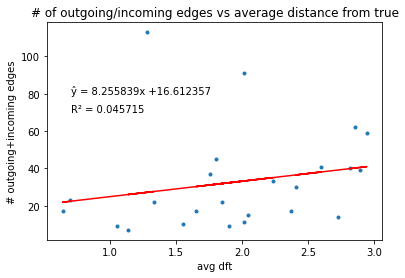

In [33]:
plt.scatter(x_dft,y_esc, marker='.')
plt.plot(x_dft, y_pred, color='red')
plt.text(0.7, 70, r2)
plt.text(0.7, 80, y_hat)
plt.ylabel('# outgoing+incoming edges')
plt.xlabel('avg dft')
plt.title('# of outgoing/incoming edges vs average distance from true')
plt.savefig('./whole brain/50 percent outgoing+incoming edges vs avg dft.png')
plt.show()

#### The zona incerta is that point at the very top so I tried removing it:

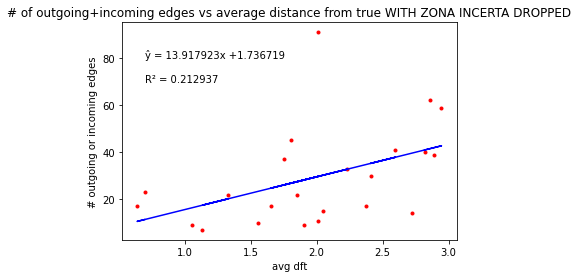

In [34]:
x_dft = pd.DataFrame(problem_nodes['avg dft'].drop([20]))
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'].drop([20]))
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))
plt.scatter(x_dft,y_esc, marker='.', color='red')
plt.plot(x_dft, y_pred, color='blue')
plt.text(0.7, 70, r2)
plt.text(0.7, 80, y_hat)
plt.ylabel('# outgoing or incoming edges')
plt.xlabel('avg dft')
plt.title('# of outgoing+incoming edges vs average distance from true WITH ZONA INCERTA DROPPED')
plt.savefig('./whole brain/50 percent escape edges vs avg dft no ZI.png')
plt.show()

#### Plot showing $\frac{\text{# outcoming or incoming edges}}{\text{# internal edges}}$ versus average optimized distance from true

In [35]:
from sklearn.linear_model import LinearRegression
x_dft = pd.DataFrame(problem_nodes['avg dft'])
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming / internal']).replace([pd.np.inf], 0)
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))

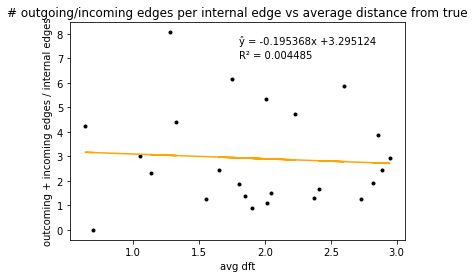

In [36]:
plt.scatter(x_dft,y_esc, marker='.', color='black')
plt.plot(x_dft, y_pred, color='orange')
plt.text(1.8, 7, r2)
plt.text(1.8, 7.6, y_hat)
plt.ylabel('outcoming + incoming edges / internal edges')
plt.xlabel('avg dft')
plt.title('# outgoing/incoming edges per internal edge vs average distance from true')
plt.savefig('./whole brain/50 percent outcoming+incoming edge ratio vs avg dft.png')
plt.show()

### Next I tried figuring out the *most wrong* each node was and comparing it to the # outgoing+incoming edges

In [37]:
# Find the largest distance from true each node has
problem_nodes['largest dft'] = 0.0
for i, node in problem_nodes['structure-id'].iteritems():
    problem_nodes['largest dft'].at[i] = edges_df.loc[(edges_df['n1'] == node) | (edges_df['n2'] == node)]['distance from true'].max()
problem_nodes.to_csv('./whole brain/50 percent problem node characteristics.csv')
problem_nodes

,structure-id,structure-abbrev,structure-name,Counts in distance>5,outgoing edges,incoming edges,internal edges,outgoing+incoming,outgoing+incoming / internal,avg dft,largest dft
0,194,LHA,Lateral hypothalamic area,7,37,3,21,40,1.904762,2.818766,10.277950
1,491,MM,Medial mammillary nucleus,6,62,0,16,62,3.875000,2.859492,10.961678
2,88,AHN,Anterior hypothalamic nucleus,6,59,0,20,59,2.950000,2.946467,14.041028
3,830,DMH,Dorsomedial nucleus of the hypothalamus,6,39,0,16,39,2.437500,2.890278,12.293952
4,210,LM,Lateral mammillary nucleus,5,14,0,11,14,1.272727,2.724984,12.477218
5,1004,PMv,Ventral premammillary nucleus,4,30,0,18,30,1.666667,2.408345,12.477218
6,515,MPN,Medial preoptic nucleus,4,41,0,7,41,5.857143,2.597151,14.139753
7,126,PVp,"Periventricular hypothalamic nucleus, posterio...",4,17,0,13,17,1.307692,2.371266,10.961678
8,525,SUM,Supramammillary nucleus,4,15,0,10,15,1.500000,2.046099,13.312440
9,693,VMH,Ventromedial hypothalamic nucleus,3,45,0,24,45,1.875000,1.801693,9.909165


In [38]:
x_dft = pd.DataFrame(problem_nodes['largest dft'])
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'])
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))

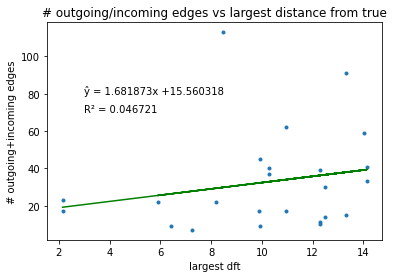

In [39]:
plt.scatter(x_dft,y_esc, marker='.')
plt.plot(x_dft, y_pred, color='green')
plt.text(3, 70, r2)
plt.text(3, 80, y_hat)
plt.ylabel('# outgoing+incoming edges')
plt.xlabel('largest dft')
plt.title('# outgoing/incoming edges vs largest distance from true')
plt.savefig('./whole brain/50 percent outgoing+incoming edges vs largest dft.png')
plt.show()

#### Again ZI is an outlier, so I tried removing it

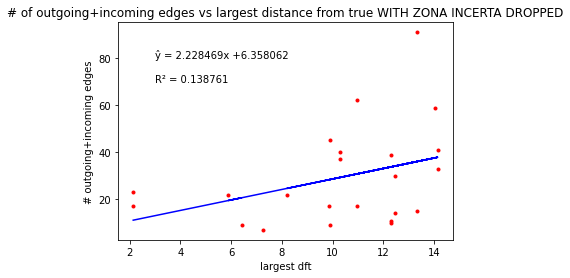

In [40]:
x_dft = pd.DataFrame(problem_nodes['largest dft'].drop([20]))
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'].drop([20]))
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))
plt.scatter(x_dft,y_esc, marker='.', color='red')
plt.plot(x_dft, y_pred, color='blue')
plt.text(3, 70, r2)
plt.text(3, 80, y_hat)
plt.ylabel('# outgoing+incoming edges')
plt.xlabel('largest dft')
plt.title('# of outgoing+incoming edges vs largest distance from true WITH ZONA INCERTA DROPPED')
plt.savefig('./whole brain/50 percent escape edges vs largest dft no ZI.png')
plt.show()

# Top 100% edge intensity analysis

In [41]:
# Create new dataframe with only edges going to/from hypothalamus
hy_edges = all_edges.loc[(all_edges['origin_id'].isin(hy_nodes)) | (all_edges['target_id'].isin(hy_nodes))]
print('There are %d edges going to/from the hypothalamus.' % hy_edges.shape[0])
hy_edges.head()

There are 1832 edges going to/from the hypothalamus.


,experiment_id,id,origin_abbrev,origin_id,target_abbrev,target_id,is_injection,max_voxel_density,max_voxel_x,max_voxel_y,...,normalized_projection_volume,projection_density,projection_energy,projection_intensity,projection_volume,sum_pixel_intensity,sum_pixels,sum_projection_pixel_intensity,sum_projection_pixels,volume
74946,313325371,634205213,VMH,693,PMv,1004,True,1.000000,7530,6680,...,0.106217,0.999797,15681.265950,15684.446912,0.104063,1.332621e+12,8.496624e+07,1.332378e+12,8.494901e+07,0.104084
57969,180674463,630259390,AHN,88,ASO,332,True,1.000000,6120,6240,...,0.002448,1.000000,15607.258483,15607.258483,0.003425,4.364258e+10,2.796300e+06,4.364258e+10,2.796300e+06,0.003425
18906,264320076,630880636,TU,614,PMv,1004,True,1.000000,7460,6580,...,0.109980,0.999935,14983.580888,14984.558083,0.084149,1.029361e+12,6.869749e+07,1.029334e+12,6.869301e+07,0.084154
81345,158258062,628586309,VMH,693,sup,349,True,0.818368,6610,6800,...,0.000104,0.999930,14964.597403,14965.643477,0.000153,1.863393e+09,1.245111e+05,1.863259e+09,1.245024e+05,0.000153
81347,158258062,628587889,VMH,693,mfsbshy,824,True,1.000000,7140,6400,...,0.000116,0.999937,14409.750982,14410.654546,0.000170,2.000256e+09,1.388033e+05,2.000121e+09,1.387946e+05,0.000170


In [42]:
# Find list of outgoing/incoming/internal edges
outgoing_edges = hy_edges.loc[~hy_edges['target_id'].isin(hy_nodes)]  # The target is not in the hypothalamus
incoming_edges = hy_edges.loc[(~hy_edges['origin_id'].isin(hy_nodes)) & (hy_edges['target_id'].isin(hy_nodes))]  # The origin isn't in the HY and the target is
internal_edges = hy_edges.loc[(hy_edges['origin_id'].isin(hy_nodes)) & (hy_edges['target_id'].isin(hy_nodes))]  # Both the origin and target are in the HY

In [43]:
# Read problem node list from CSV
problem_nodes = pd.read_csv('../../spreadsheets/Hypothalamic Optimization counts.csv')
problem_nodes = problem_nodes.loc[problem_nodes['structure-id'].isin(hy_nodes)]

# For each node, count up # of escape edges it participates in
problem_nodes['outgoing edges'] = problem_nodes.apply(lambda row: outgoing_edges.loc[outgoing_edges['origin_id'] == row['structure-id']].shape[0], axis=1)
# For each node, count up # of nonescape edges it participates in
problem_nodes['incoming edges'] = problem_nodes.apply(lambda row: incoming_edges.loc[incoming_edges['target_id'] == row['structure-id']].shape[0], axis=1)
# For each node, count up # of internal edges it participates in
problem_nodes['internal edges'] = problem_nodes.apply(lambda row: internal_edges.loc[(internal_edges['origin_id'] == row['structure-id']) | (internal_edges['target_id'] == row['structure-id'])].shape[0], axis=1)

# Add up edges that communicate w/ outside HY
problem_nodes['outgoing+incoming'] = problem_nodes['outgoing edges'] + problem_nodes['incoming edges']
# Idk if this is useful, but calculate ratio of escape edges : nonescape edges
problem_nodes['outgoing+incoming / internal'] = problem_nodes['outgoing+incoming'] / problem_nodes['internal edges']
problem_nodes.head()

,structure-id,structure-abbrev,structure-name,Counts in distance>5,outgoing edges,incoming edges,internal edges,outgoing+incoming,outgoing+incoming / internal
0,194,LHA,Lateral hypothalamic area,7,122,11,36,133,3.694444
1,491,MM,Medial mammillary nucleus,6,91,2,21,93,4.428571
2,88,AHN,Anterior hypothalamic nucleus,6,70,2,26,72,2.769231
3,830,DMH,Dorsomedial nucleus of the hypothalamus,6,64,2,27,66,2.444444
4,210,LM,Lateral mammillary nucleus,5,33,1,19,34,1.789474


#### Plot showing problem nodes with the # of edges they participate in with a poorly optimized solution, compared to # of escape edges that node has

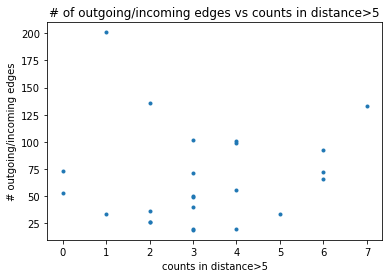

In [44]:
import matplotlib.pyplot as plt
plt.scatter(problem_nodes['Counts in distance>5'],problem_nodes['outgoing+incoming'], marker='.')
plt.ylabel('# outgoing/incoming edges')
plt.xlabel('counts in distance>5')
plt.title('# of outgoing/incoming edges vs counts in distance>5')
plt.savefig('./whole brain/100 percent outgoing+incoming edges vs counts in distance.png')
plt.show()

In [45]:
# Get edge list with optimization distances
edges_df = pd.read_csv('../../spreadsheets/Hypothalamic Optimization Distances.csv')
edges_df['distance from true'] = abs(edges_df['distance from true'])
edges_df.head(5)

,n1,n2,intensity,distance,R1+R2,opt. distance,distance from true,structure-name,structure-name.1
0,390,347,0.000000,5.952730,0.520410,3.415775,2.536956,Supraoptic nucleus,Subparaventricular zone
1,347,390,187.580505,5.952730,0.520410,3.416737,2.535993,Subparaventricular zone,Supraoptic nucleus
2,523,525,2858.119629,2.788942,0.903663,0.408480,2.380462,Medial preoptic area,Supramammillary nucleus
3,525,523,1468.252319,2.788942,0.903663,0.408575,2.380367,Supramammillary nucleus,Medial preoptic area
4,210,515,1130.482910,2.621622,0.723160,0.414124,2.207498,Lateral mammillary nucleus,Medial preoptic nucleus


In [46]:
def check_zero(a):
    if a == 0:
        return 1
    else:
        return a

In [47]:
# Get the average distance from true for each node by summing up all its distances in every node it participates in
dft_df = pd.DataFrame((edges_df.groupby(['n1'])['distance from true'].sum() + edges_df.groupby(['n2'])['distance from true'].sum()).rename('avg dft'))
problem_nodes = problem_nodes.merge(dft_df, left_on='structure-id', right_on='n1')
# Then divide by the number of edges it's in to get the average
problem_nodes['avg dft'] =  problem_nodes.apply(lambda x: x['avg dft'] / check_zero(edges_df.loc[(edges_df['n1'] == x['structure-id']) | (edges_df['n2'] == x['structure-id'])].shape[0]), axis=1)
problem_nodes.head()

,structure-id,structure-abbrev,structure-name,Counts in distance>5,outgoing edges,incoming edges,internal edges,outgoing+incoming,outgoing+incoming / internal,avg dft
0,194,LHA,Lateral hypothalamic area,7,122,11,36,133,3.694444,2.818766
1,491,MM,Medial mammillary nucleus,6,91,2,21,93,4.428571,2.859492
2,88,AHN,Anterior hypothalamic nucleus,6,70,2,26,72,2.769231,2.946467
3,830,DMH,Dorsomedial nucleus of the hypothalamus,6,64,2,27,66,2.444444,2.890278
4,210,LM,Lateral mammillary nucleus,5,33,1,19,34,1.789474,2.724984


#### Plot showing the # of escape edges a node has vs it's average optimized distance from true

In [48]:
from sklearn.linear_model import LinearRegression
x_dft = pd.DataFrame(problem_nodes['avg dft'])
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'])
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))

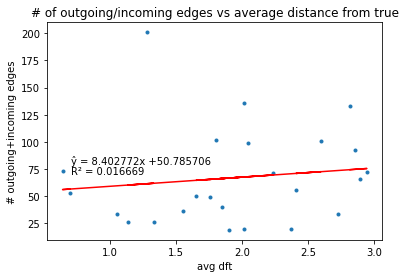

In [49]:
plt.scatter(x_dft,y_esc, marker='.')
plt.plot(x_dft, y_pred, color='red')
plt.text(0.7, 70, r2)
plt.text(0.7, 80, y_hat)
plt.ylabel('# outgoing+incoming edges')
plt.xlabel('avg dft')
plt.title('# of outgoing/incoming edges vs average distance from true')
plt.savefig('./whole brain/100 percent outgoing+incoming edges vs avg dft.png')
plt.show()

#### The zona incerta is that point at the very top so I tried removing it:

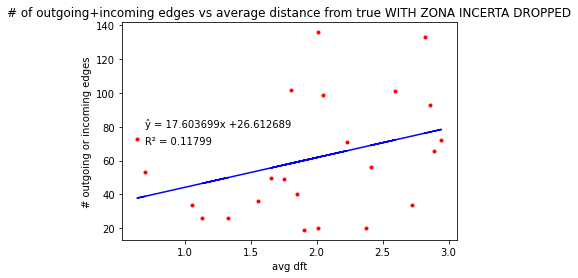

In [50]:
x_dft = pd.DataFrame(problem_nodes['avg dft'].drop([20]))
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'].drop([20]))
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))
plt.scatter(x_dft,y_esc, marker='.', color='red')
plt.plot(x_dft, y_pred, color='blue')
plt.text(0.7, 70, r2)
plt.text(0.7, 80, y_hat)
plt.ylabel('# outgoing or incoming edges')
plt.xlabel('avg dft')
plt.title('# of outgoing+incoming edges vs average distance from true WITH ZONA INCERTA DROPPED')
plt.savefig('./whole brain/100 percent escape edges vs avg dft no ZI.png')
plt.show()

#### Plot showing $\frac{\text{# outcoming or incoming edges}}{\text{# internal edges}}$ versus average optimized distance from true

In [51]:
from sklearn.linear_model import LinearRegression
x_dft = pd.DataFrame(problem_nodes['avg dft'])
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming / internal']).replace([pd.np.inf], 0)
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))

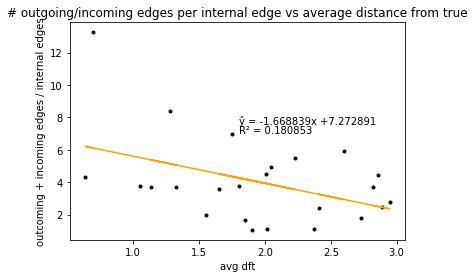

In [52]:
plt.scatter(x_dft,y_esc, marker='.', color='black')
plt.plot(x_dft, y_pred, color='orange')
plt.text(1.8, 7, r2)
plt.text(1.8, 7.6, y_hat)
plt.ylabel('outcoming + incoming edges / internal edges')
plt.xlabel('avg dft')
plt.title('# outgoing/incoming edges per internal edge vs average distance from true')
plt.savefig('./whole brain/100 percent outcoming+incoming edge ratio vs avg dft.png')
plt.show()

### Next I tried figuring out the *most wrong* each node was and comparing it to the # outgoing+incoming edges

In [53]:
# Find the largest distance from true each node has
problem_nodes['largest dft'] = 0.0
for i, node in problem_nodes['structure-id'].iteritems():
    problem_nodes['largest dft'].at[i] = edges_df.loc[(edges_df['n1'] == node) | (edges_df['n2'] == node)]['distance from true'].max()
problem_nodes.to_csv('./whole brain/100 percent problem node characteristics.csv')
problem_nodes

,structure-id,structure-abbrev,structure-name,Counts in distance>5,outgoing edges,incoming edges,internal edges,outgoing+incoming,outgoing+incoming / internal,avg dft,largest dft
0,194,LHA,Lateral hypothalamic area,7,122,11,36,133,3.694444,2.818766,10.277950
1,491,MM,Medial mammillary nucleus,6,91,2,21,93,4.428571,2.859492,10.961678
2,88,AHN,Anterior hypothalamic nucleus,6,70,2,26,72,2.769231,2.946467,14.041028
3,830,DMH,Dorsomedial nucleus of the hypothalamus,6,64,2,27,66,2.444444,2.890278,12.293952
4,210,LM,Lateral mammillary nucleus,5,33,1,19,34,1.789474,2.724984,12.477218
5,1004,PMv,Ventral premammillary nucleus,4,54,2,23,56,2.434783,2.408345,12.477218
6,515,MPN,Medial preoptic nucleus,4,95,6,17,101,5.941176,2.597151,14.139753
7,126,PVp,"Periventricular hypothalamic nucleus, posterio...",4,20,0,18,20,1.111111,2.371266,10.961678
8,525,SUM,Supramammillary nucleus,4,95,4,20,99,4.950000,2.046099,13.312440
9,693,VMH,Ventromedial hypothalamic nucleus,3,101,1,27,102,3.777778,1.801693,9.909165


In [54]:
x_dft = pd.DataFrame(problem_nodes['largest dft'])
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'])
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))

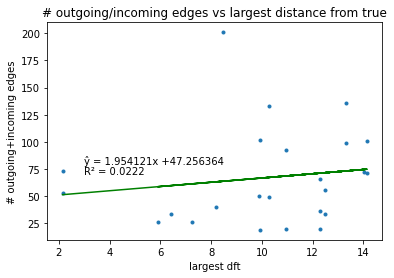

In [55]:
plt.scatter(x_dft,y_esc, marker='.')
plt.plot(x_dft, y_pred, color='green')
plt.text(3, 70, r2)
plt.text(3, 80, y_hat)
plt.ylabel('# outgoing+incoming edges')
plt.xlabel('largest dft')
plt.title('# outgoing/incoming edges vs largest distance from true')
plt.savefig('./whole brain/100 percent outgoing+incoming edges vs largest dft.png')
plt.show()

#### Again ZI is an outlier, so I tried removing it

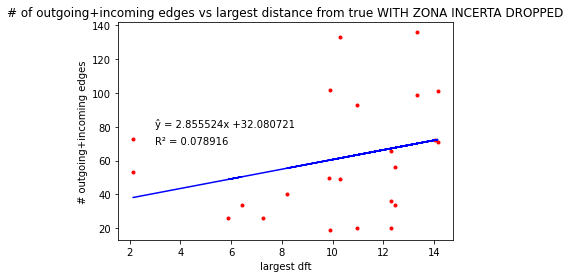

In [56]:
x_dft = pd.DataFrame(problem_nodes['largest dft'].drop([20]))
y_esc = pd.DataFrame(problem_nodes['outgoing+incoming'].drop([20]))
reg = LinearRegression().fit(x_dft,y_esc)
r2 = 'R\u00b2 = ' + str(round(reg.score(x_dft,y_esc), 6))
y_pred = reg.predict(x_dft)
y_hat = '\u0177 = ' + str(round(reg.coef_[0][0], 6)) + 'x +' + str(round(*reg.intercept_, 6))
plt.scatter(x_dft,y_esc, marker='.', color='red')
plt.plot(x_dft, y_pred, color='blue')
plt.text(3, 70, r2)
plt.text(3, 80, y_hat)
plt.ylabel('# outgoing+incoming edges')
plt.xlabel('largest dft')
plt.title('# of outgoing+incoming edges vs largest distance from true WITH ZONA INCERTA DROPPED')
plt.savefig('./whole brain/100 percent escape edges vs largest dft no ZI.png')
plt.show()